In [139]:
%run ../calculate_Q.py

In [5]:
import matplotlib.pyplot as plt

In [24]:
t = np.arange(100)
mag_nn = np.sin(t)
noise = np.random.random(100)-0.5
mag = mag_nn + noise

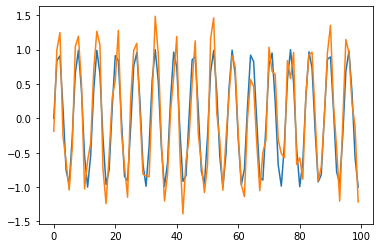

In [25]:
plt.plot(t, mag_nn)
plt.plot(t, mag)

In [26]:
smooth_mag = smooth_phase(t, mag, 2*np.pi)

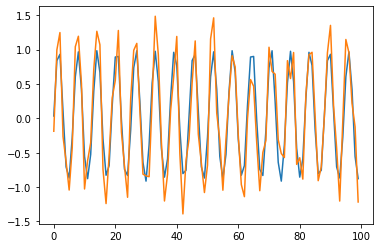

In [27]:
plt.plot(smooth_mag)
plt.plot(t, mag)

In [28]:
residual = mag - smooth_mag

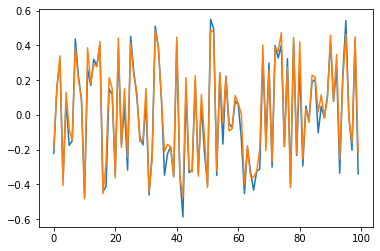

In [30]:
plt.plot(t, residual)
plt.plot(t, noise)

In [39]:
np.std(residual + 10)

0.2973279135700206

In [ ]:
# TODO
# 

In [60]:
from wuvars.data import spreadsheet, photometry
dat = photometry.group_wserv_v2(photometry.load_wserv_v2(8))
sid = 44989782480555
star_dat = dat.groups[dat.groups.keys["SOURCEID"] == sid]

Loading WSERV8 photometry data... DONE (elapsed time: 0.14s)


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: invalid value encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


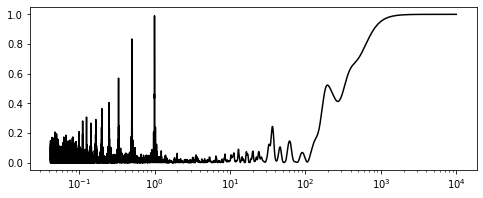

In [61]:
ls_window = LombScargle(star_dat['MEANMJDOBS'], 1, fit_mean=False, center_data=False)
power_window = ls_window.power(freq)

fig, ax = plt.subplots(figsize=(8, 3))
ax.semilogx(1. / freq, power_window, '-k');

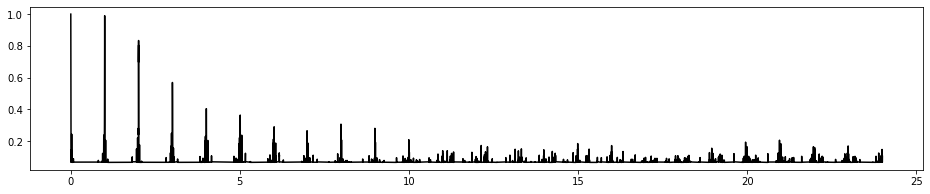

In [63]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot(freq[power_window>2*np.nanstd(power_window)], power_window[power_window>2*np.nanstd(power_window)], '-k');
# ax.axhline(2*np.nanstd(power))

In [64]:
mask = star_dat["KAPERMAG3"].mask
times = star_dat["MEANMJDOBS"][~mask]
mags = star_dat["KAPERMAG3"][~mask]
errs = star_dat["KAPERMAG3ERR"][~mask]

In [71]:
ls = LombScargle(times, mags, dy=errs)
power = ls.power(freq, assume_regular_frequency=True)


3.0665312276397834


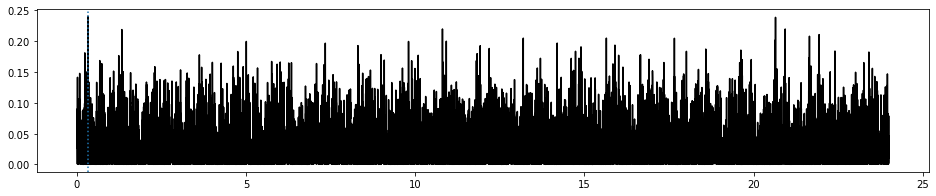

In [82]:
fig, ax = plt.subplots(figsize=(16, 3))
# ax.plot(freq, power, '-k')
ax.plot(freq[power_window<2*np.nanstd(power_window)], power[power_window<2*np.nanstd(power_window)], '-k')

fmax = freq[np.nanargmax(power)]
print(1/fmax)
ax.axvline(fmax, ls=':')

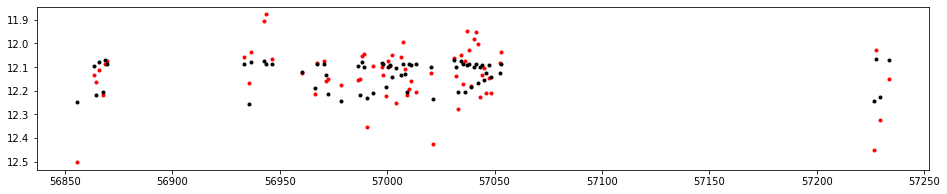

In [92]:
plt.figure(figsize=(16, 3))
smooth_mag = smooth_phase(times, mags, 1/fmax)
plt.plot(times, mags, 'r.')
plt.plot(times, smooth_mag, 'k.')
plt.gca().invert_yaxis()

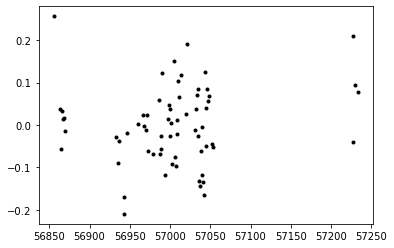

In [94]:
residual =  mags - smooth_mag
plt.plot(times, mags - smooth_mag, 'k.')

In [97]:
sigma = np.median(errs)

In [98]:
Q = (np.std(residual)**2 - sigma**2) / (np.std(mags)**2 - sigma**2)

In [99]:
print(Q)

0.6144672681557027


In [103]:
newsid = 45195940889679
dat11 = photometry.group_wserv_v2(photometry.load_wserv_v2(11))
star_dat11 = dat11.groups[dat11.groups.keys["SOURCEID"] == newsid]

Loading WSERV11 photometry data... DONE (elapsed time: 0.23s)


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: invalid value encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


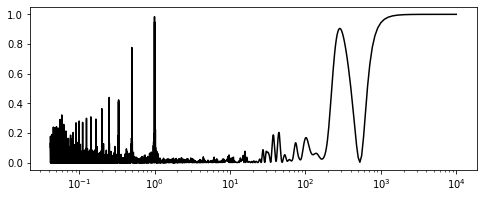

In [104]:
ls_window = LombScargle(star_dat11['MEANMJDOBS'], 1, fit_mean=False, center_data=False)
power_window = ls_window.power(freq)

fig, ax = plt.subplots(figsize=(8, 3))
ax.semilogx(1. / freq, power_window, '-k');

In [105]:
mask = star_dat11["KAPERMAG3"].mask
times = star_dat11["MEANMJDOBS"][~mask]
mags = star_dat11["KAPERMAG3"][~mask]
errs = star_dat11["KAPERMAG3ERR"][~mask]

In [106]:
ls = LombScargle(times, mags, dy=errs)
power = ls.power(freq, assume_regular_frequency=True)


6.402021980367051


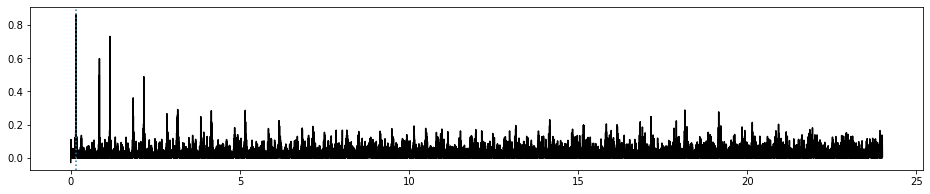

In [127]:

exclude = power_window>2*np.nanstd(power_window)

fig, ax = plt.subplots(figsize=(16, 3))
ax.plot(freq[~exclude], power[~exclude], '-k')
# ax.plot(freq[power_window<2*np.nanstd(power_window)], power[power_window<2*np.nanstd(power_window)], '-k')


fmax = freq[~exclude][np.nanargmax(power[~exclude])]
print(1/fmax)
per = 1/fmax
ax.axvline(fmax, ls=':')

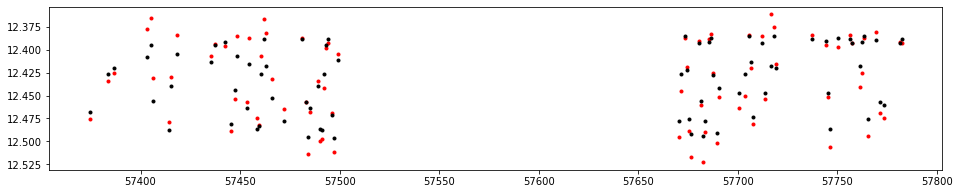

In [112]:
plt.figure(figsize=(16, 3))
smooth_mag = smooth_phase(times, mags, 1/fmax)
plt.plot(times, mags, 'r.')
plt.plot(times, smooth_mag, 'k.')
plt.gca().invert_yaxis()

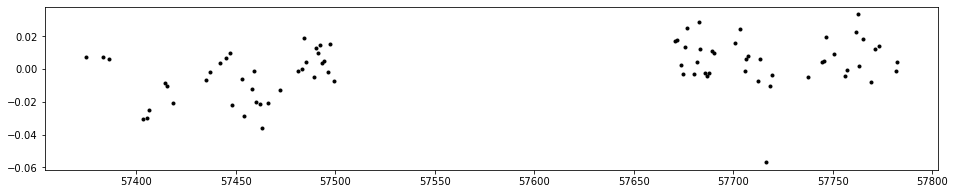

In [114]:
plt.figure(figsize=(16, 3))
residual =  mags - smooth_mag
plt.plot(times, mags - smooth_mag, 'k.')

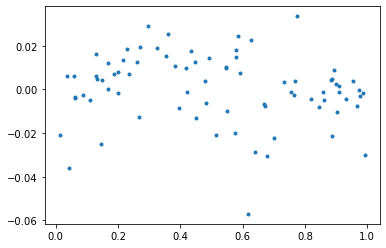

In [135]:
# plt.plot(((times % per)/per +0.25) % 1.0, mags, '.')
# plt.plot(((times % per)/per +0.25) % 1.0, smooth_mag, '.')
plt.plot(((times % per)/per +0.25) % 1.0, residual, '.')

In [136]:
sigma = np.median(errs)

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:753: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [137]:
Q = (np.std(residual)**2 - sigma**2) / (np.std(mags)**2 - sigma**2)
print(Q)

0.07879654710701271


In [148]:
%run ../calculate_Q.py

In [149]:
compute_Q_automatically(dat11, newsid)

1/fmax = 6.402


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:753: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: invalid value encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)


1/fmax = 6.402
1/fmax = 6.402


{'J': (0.06420372685141326, 0.15620065083604515),
 'H': (0.05951752671433084, 0.15620065083604515),
 'K': (0.07879654710701271, 0.15620065083604515)}

In [142]:
np.percentile?

In [143]:
xx = np.arange(1000)

In [144]:
np.percentile(xx, 10)

99.9

In [145]:
np.percentile(xx, 90)

899.1

In [146]:
%run ../calculate_M.py

In [147]:
compute_M(dat11, newsid)

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:753: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


{'J': 0.23246006270698052, 'H': 0.07311897073261416, 'K': 0.24437334772643865}